## Word2Vec Example

In [71]:
from konlpy.tag import Twitter
from gensim.models import word2vec
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument, LabeledSentence
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import gensim
import time

In [72]:
kor_corpus = pd.read_csv('C:\\Users\\user\\downloads\\news_koreanwave.csv', encoding='utf-8')

In [73]:
pos_tagger = Twitter()
stopword = ['것','수','저']
total_news = []

for news in kor_corpus['contents'].head():
    pos_news = ['/'.join(t[:-1]) for t in pos_tagger.pos(news) if ((t[1]=='Noun') & (t[0] not in stopword))]
    total_news.append(' '.join(pos_news))

In [74]:
contents = kor_corpus['contents']

In [75]:
def hash32(value):
     return hash(value) & 0xffffffff

In [76]:
doc_list = []

for doc in contents[:1000]:
    tokens = [t for t in pos_tagger.nouns(doc) if len(t)>1]
    doc_list.append(tokens)

In [77]:
min_count = 3
hidden_size = 30
workers = 1
window = 3
epoch = 30

In [78]:
start = time.time()
model_total = gensim.models.Word2Vec(doc_list, window = window, min_count=min_count, size = hidden_size, workers = workers, iter = epoch, seed=1, hashfxn=hash32)
end = time.time()
print(end-start)

11.887766361236572


In [79]:
model_total.most_similar('북한')

[('비핵화', 0.8507741093635559),
 ('국제사회', 0.8358717560768127),
 ('핵실험', 0.799824595451355),
 ('도발', 0.7892884612083435),
 ('북핵', 0.7677214741706848),
 ('견해', 0.756578266620636),
 ('발사', 0.7535418272018433),
 ('감행', 0.752055287361145),
 ('안보리', 0.7465500235557556),
 ('안전보장', 0.7453128099441528)]

In [80]:
print(model_total)

Word2Vec(vocab=7624, size=30, alpha=0.025)


## Doc2Vec Example

In [81]:
Td = [LabeledSentence(doc,["doc_%d" %i]) for i,doc in enumerate(doc_list)]
d2v = Doc2Vec(Td, window = window, min_count=min_count, size = hidden_size, workers = workers, iter = epoch, seed=1, hashfxn=hash32)

In [82]:
d2v.docvecs.most_similar('doc_50', topn=3)

[('doc_814', 0.752768337726593),
 ('doc_916', 0.7368470430374146),
 ('doc_630', 0.7349492311477661)]

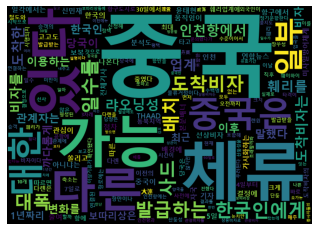

In [83]:
wordcloud = WordCloud(font_path = "C:\\windows\\Fonts\\malgunbd.ttf", width=700, height=500).generate(contents[50])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

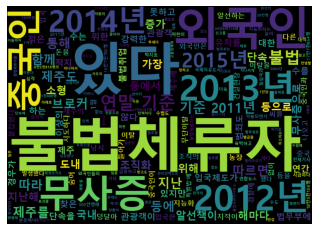

In [84]:
wordcloud = WordCloud(font_path = "C:\\windows\\Fonts\\malgunbd.ttf", width=700, height=500).generate(contents[814])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

중국, 체류가 주 내용인 두 워드크라우드를 갖는 문서를 찾아낸 것으로 보아,

doc2vec이 잘 되었다고 판단된다.